In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


In [5]:
cols= ["households"]

df["households"]= df[cols].apply(pd.to_numeric ,errors='coerce',axis= 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          16255 non-null  float64
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.7+ MB


In [6]:
df.isna().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            4385
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20382.000000,20640.000000,15758.000000,20596.000000,16255.000000,17873.000000,20640.000000
mean,-119.569704,35.631861,28.676283,2635.763081,539.920104,1424.928724,500.797170,3.939403,206855.816909
std,2.003532,2.135952,12.589284,2181.615252,419.834171,1132.237768,378.291833,1.943517,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.598600,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.587100,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,652.000000,1725.000000,607.000000,4.830400,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


In [8]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
values=[df["housing_median_age"],df["total_bedrooms"],df["population"],df["households"],df["median_income"]]

for i in values:
    
    i = i.fillna(i.mean(),inplace=True)

df.isna().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms           0
population               0
households               0
median_income            0
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

<AxesSubplot:>

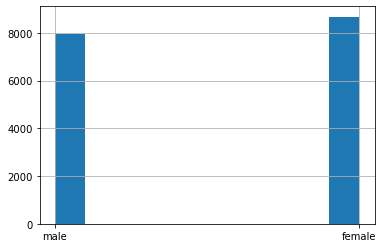

In [10]:
df.gender.hist()

In [11]:
replaced_mode = df.copy()

replaced_mode.gender.fillna(replaced_mode.gender.mode()[0],inplace=True)

replaced_mode["gender"].isna().sum()

0

<AxesSubplot:>

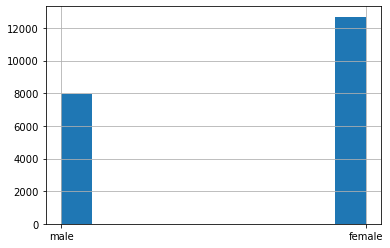

In [12]:
replaced_mode.gender.hist()

<AxesSubplot:>

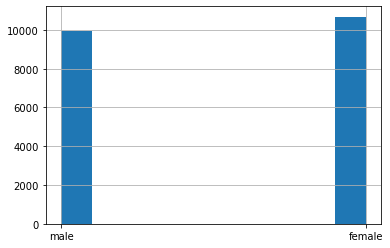

In [13]:
list = ["male","female"]

df['gender'] = df['gender'].fillna(pd.Series(np.random.choice(list,size=len(df.index))))

df.gender.hist()

In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.676283,2635.763081,539.920104,1424.928724,500.797170,3.939403,206855.816909
std,2.003532,2.135952,12.510350,2181.615252,366.834544,1131.030223,335.708832,1.808550,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,338.000000,788.000000,314.000000,2.741250,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,539.920104,1167.000000,498.000000,3.926300,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,566.000000,1723.000000,538.000000,4.583300,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              20640 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.7+ MB


In [16]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
gender                0
dtype: int64

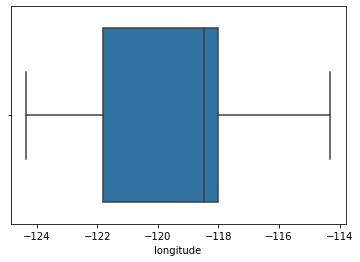

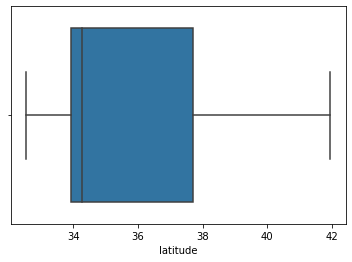

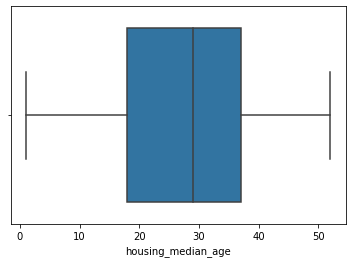

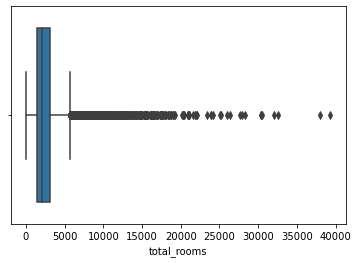

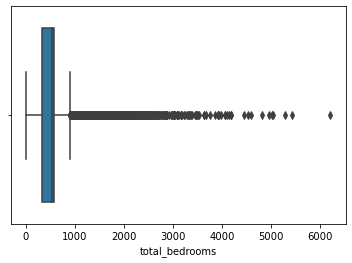

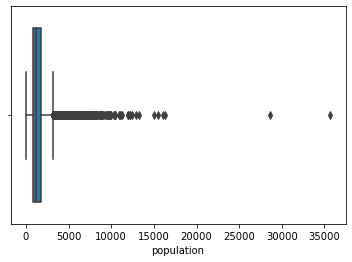

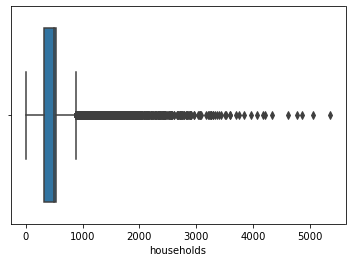

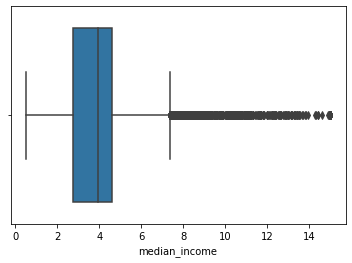

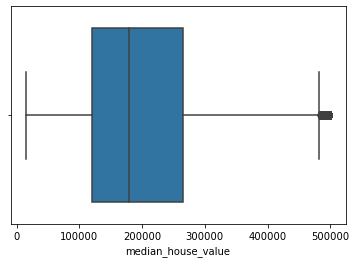

In [18]:
for col in df.columns:
    if df[col].dtype != 'object':
        bp = sns.boxplot(data=df,x=col)
        plt.show()

In [19]:
df.drop(df[df['households'] > 800].index , axis=0,inplace=True)

<AxesSubplot:xlabel='households'>

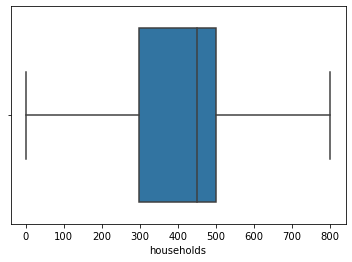

In [20]:
sns.boxplot(data=df,x="households")


In [21]:
df.duplicated().sum()

0

In [22]:
le = preprocessing.LabelEncoder()

In [23]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18498 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18498 non-null  float64
 1   latitude            18498 non-null  float64
 2   housing_median_age  18498 non-null  float64
 3   total_rooms         18498 non-null  int64  
 4   total_bedrooms      18498 non-null  float64
 5   population          18498 non-null  float64
 6   households          18498 non-null  float64
 7   median_income       18498 non-null  float64
 8   median_house_value  18498 non-null  int64  
 9   ocean_proximity     18498 non-null  int32  
 10  gender              18498 non-null  int32  
dtypes: float64(7), int32(2), int64(2)
memory usage: 1.6 MB
